In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, expon, gamma, lognorm, weibull_min, kstest, kurtosis, skew
import gdown
file_id = '1j0ipbG5eCBuWZMtFmDslW1q4FSlbZzfD'
url = f'https://drive.google.com/uc?id={file_id}'

rehab_times = 'RehabilitationTimes.xlsx'
gdown.download(url, rehab_times, quiet=False)
rehab_df = pd.read_excel(rehab_times)
rehab_df.head()

Downloading...
From: https://drive.google.com/uc?id=1j0ipbG5eCBuWZMtFmDslW1q4FSlbZzfD
To: /content/RehabilitationTimes.xlsx
100%|██████████| 57.8k/57.8k [00:00<00:00, 56.4MB/s]


,Patient Id,Rehabilitation Time (Days),Rehab Category
0,0,14.586638,Medically Complex
1,1,12.532093,Medically Complex
2,2,48.087618,Stroke
3,3,6.104037,Stroke
4,4,10.763928,Medically Complex


In [5]:
#Seperate the Groups
medically_complex_data = rehab_df[rehab_df['Rehab Category'] == 'Medically Complex']['Rehabilitation Time (Days)'].reset_index(drop=True)
stroke_data = rehab_df[rehab_df['Rehab Category'] == 'Stroke']['Rehabilitation Time (Days)'].reset_index(drop=True)

#Medically Complex Data Dist'n Anaylsis



In [6]:
medically_complex_data.head()

,Rehabilitation Time (Days)
0,14.586638
1,12.532093
2,10.763928
3,12.254970
4,10.147572


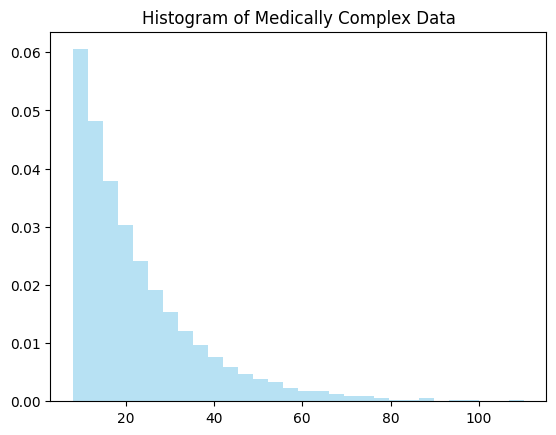

In [7]:
plt.hist(medically_complex_data, bins=30, density=True, alpha=0.6, color='skyblue')
plt.title("Histogram of Medically Complex Data")
plt.show()

In [8]:
medically_complex_data.describe()

,Rehabilitation Time (Days)
count,1000.000000
mean,22.801338
std,14.571117
min,8.079934
25%,12.328694
50%,18.314080
75%,28.533499
max,110.218432


In [9]:
print("Skewness:", skew(medically_complex_data))
print("Kurtosis:", kurtosis(medically_complex_data))

Skewness: 1.853683052660405
Kurtosis: 4.520396071791165


Since Skewness is positive, and from the histogram we can see it is right skewed. exponential, gamma, and lognormal distributions are suitable candidates. Additionally a large kurtosis suggests a distribution with a heavier tail such as gamma or lognormal

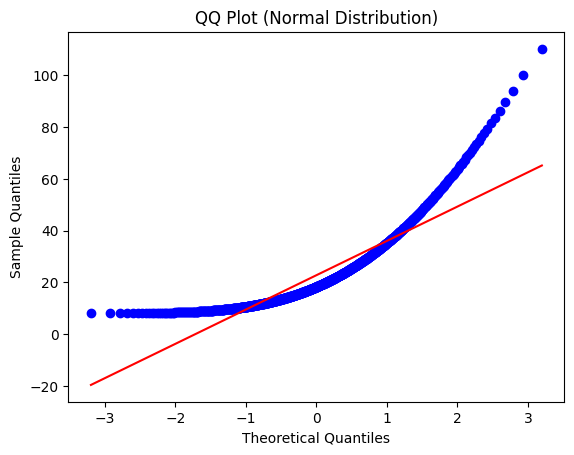

In [10]:
stats.probplot(medically_complex_data, dist="norm", plot=plt)
plt.title("QQ Plot (Normal Distribution)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

From the Q-Q plot we can evidnetly see that the data does not follow the normal distribution

Kolmogorov-Smirnov Test Results:
Exponential: D=0.0020390125595404207, p-value=1.0
Gamma: D=0.012348646087766979, p-value=0.9976108381810899
Log-Normal: D=0.036459767163636414, p-value=0.13665344075334762


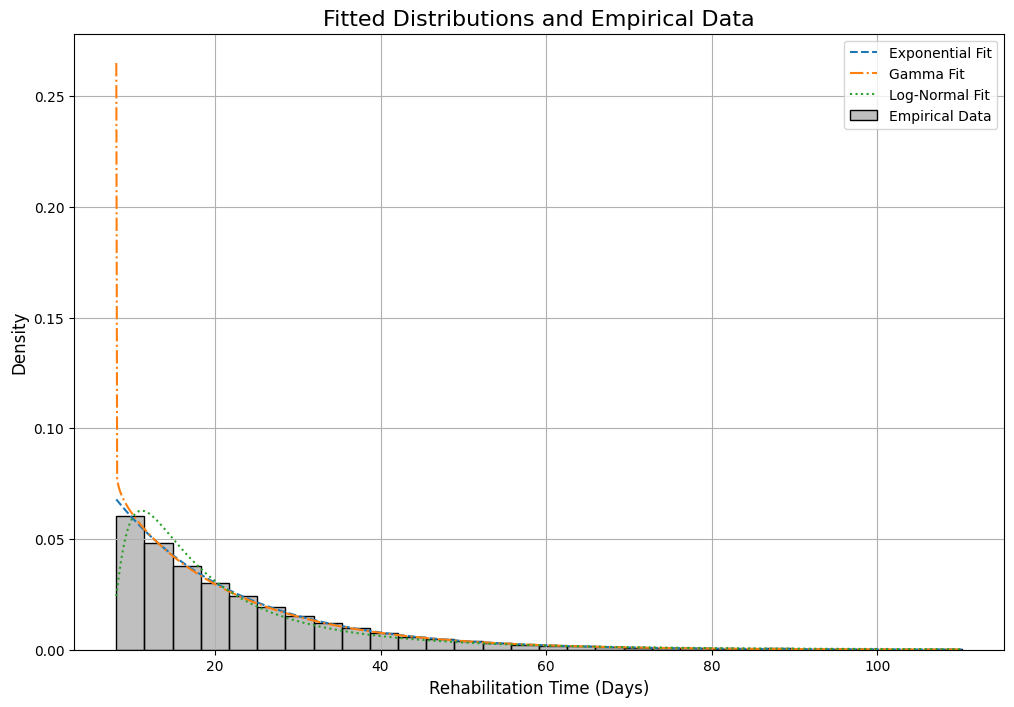

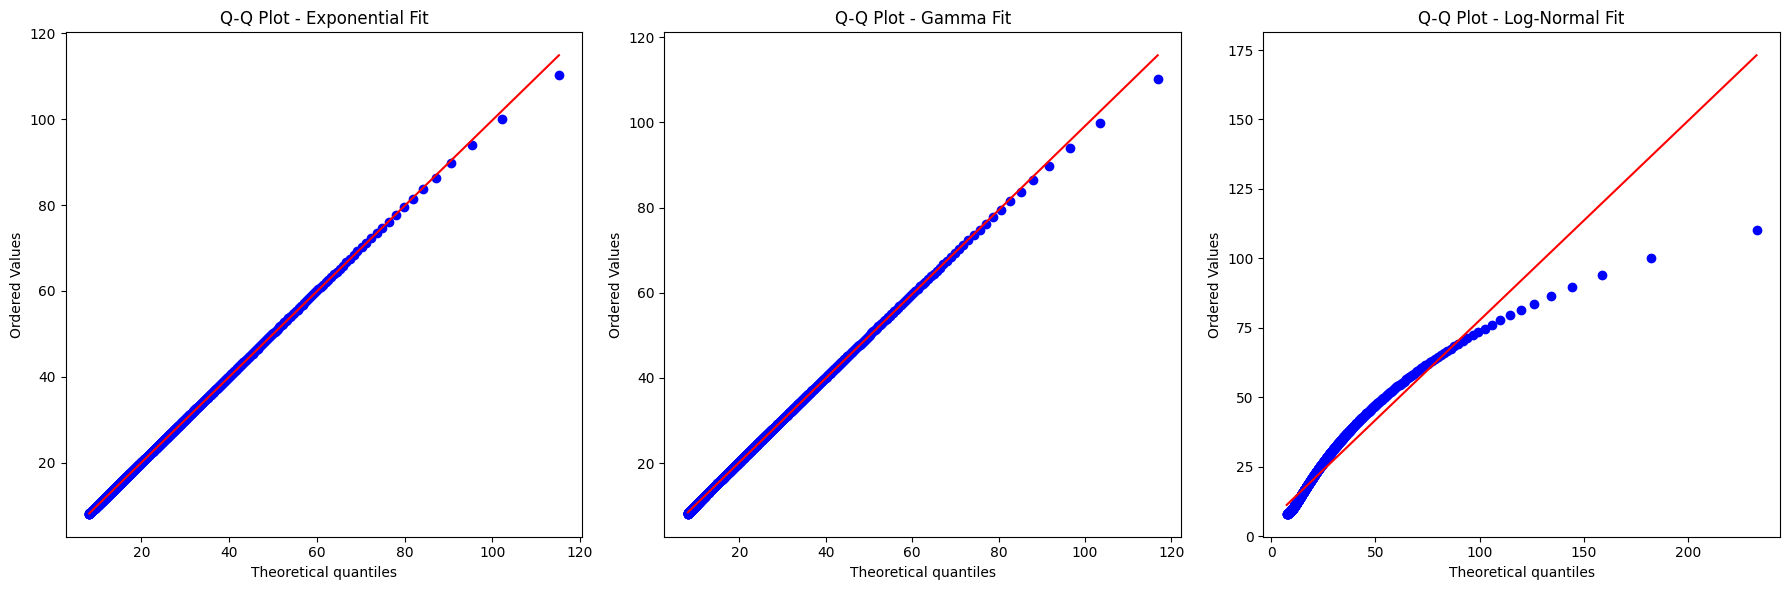

In [11]:
def dist(data):

  # Fit the distributions
  params_exp = expon.fit(data)   # Exponential
  params_gamma = gamma.fit(data)  # Gamma
  params_lognorm = lognorm.fit(data)  # Log-Normal

  # Generate fitted PDFs
  x = np.linspace(data.min(), data.max(), 1000)
  pdf_exp = expon.pdf(x, *params_exp)
  pdf_gamma = gamma.pdf(x, *params_gamma)
  pdf_lognorm = lognorm.pdf(x, *params_lognorm)

  ks_exp = kstest(data, 'expon', args=params_exp)
  ks_gamma = kstest(data, 'gamma', args=params_gamma)
  ks_lognorm = kstest(data, 'lognorm', args=params_lognorm)

  print("Kolmogorov-Smirnov Test Results:")
  print(f"Exponential: D={ks_exp.statistic}, p-value={ks_exp.pvalue}")
  print(f"Gamma: D={ks_gamma.statistic}, p-value={ks_gamma.pvalue}")
  print(f"Log-Normal: D={ks_lognorm.statistic}, p-value={ks_lognorm.pvalue}")

  # Plot the histogram of the data
  plt.figure(figsize=(12, 8))
  sns.histplot(data, bins=30, kde=False, stat='density', label='Empirical Data', color='gray', alpha=0.5)

  # Plot the fitted distributions
  plt.plot(x, pdf_exp, label='Exponential Fit', linestyle='--')
  plt.plot(x, pdf_gamma, label='Gamma Fit', linestyle='-.')
  plt.plot(x, pdf_lognorm, label='Log-Normal Fit', linestyle=':')

  # Add titles and legends
  plt.title('Fitted Distributions and Empirical Data', fontsize=16)
  plt.xlabel('Rehabilitation Time (Days)', fontsize=12)
  plt.ylabel('Density', fontsize=12)
  plt.legend()
  plt.grid()
  plt.show()

  # Step 2: Q-Q Plots for each distribution
  plt.figure(figsize=(18, 6))

  # Q-Q Plot for Exponential
  plt.subplot(1, 3, 1)
  stats.probplot(data, dist="expon", sparams=params_exp, plot=plt)
  plt.title('Q-Q Plot - Exponential Fit')

  # Q-Q Plot for Gamma
  plt.subplot(1, 3, 2)
  stats.probplot(data, dist="gamma", sparams=params_gamma, plot=plt)
  plt.title('Q-Q Plot - Gamma Fit')

  # Q-Q Plot for Log-Normal
  plt.subplot(1, 3, 3)
  stats.probplot(data, dist="lognorm", sparams=params_lognorm, plot=plt)
  plt.title('Q-Q Plot - Log-Normal Fit')

  plt.tight_layout()
  plt.show()

dist(medically_complex_data)


Both the expon and gamma both fit the medically complex model fairly well. However the gamma model is more flexibile than the expon model (expon is gamma with alpha = 1) so we are going to fit medically_complex with a expon

In [15]:
loc_param, scale_param = expon.fit(medically_complex_data)

# Display the estimated shape parameter (alpha)
print(f"Location Parameter (loc): {loc_param}")
print(f"Scale Parameter (scale): {scale_param}")

print(1/scale_param)

Location Parameter (loc): 8.079934158750012
Scale Parameter (scale): 14.721403841249993
0.0679283043100793


#Stroke Dist'n Analysis

In [16]:
stroke_data.describe()

,Rehabilitation Time (Days)
count,1000.000000
mean,27.265874
std,26.530303
min,-9.802194
25%,8.985351
50%,20.783233
75%,38.138259
max,200.815721


In [17]:
stroke_data = stroke_data[stroke_data >= 0].dropna()
stroke_data.describe()

,Rehabilitation Time (Days)
count,927.000000
mean,29.673489
std,26.065288
min,0.003885
25%,11.446310
50%,22.769151
75%,39.987095
max,200.815721


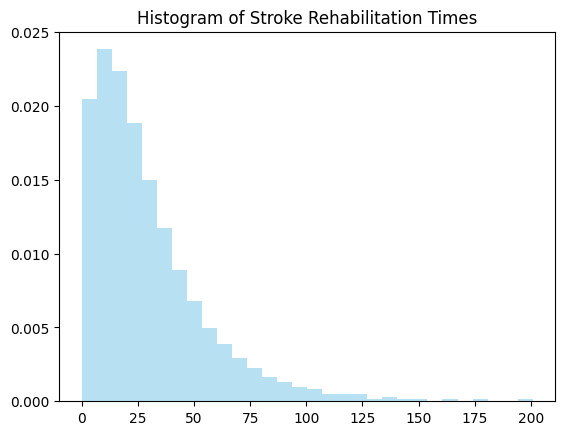

In [18]:
plt.hist(stroke_data, bins=30, density=True, alpha=0.6, color='skyblue')
plt.title("Histogram of Stroke Rehabilitation Times")
plt.show()

In [19]:
print("Skewness:", skew(stroke_data))
print("Kurtosis:", kurtosis(stroke_data))

Skewness: 1.9279932894637062
Kurtosis: 5.5981284653143


In [20]:
from scipy.stats import kstest, gamma
shape_param_stroke, loc_param_stroke, scale_param_stroke = gamma.fit(stroke_data)
ks_result = kstest(stroke_data, 'gamma', args=(shape_param_stroke, loc_param_stroke, scale_param_stroke))
p_value = ks_result.pvalue
print(f"p-value for stroke data and gamma distribution: {p_value}")

p-value for stroke data and gamma distribution: 0.0


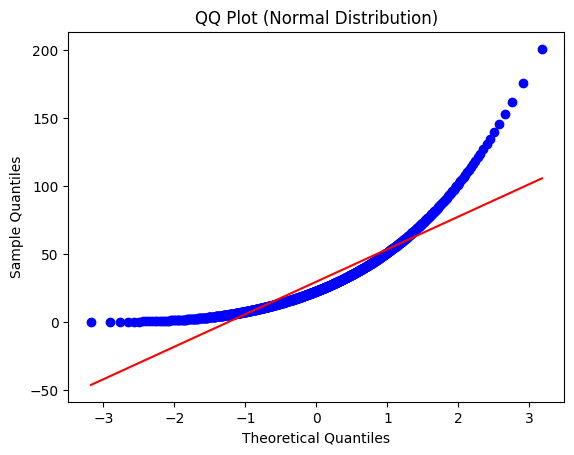

In [21]:
stats.probplot(stroke_data, dist="norm", plot=plt)
plt.title("QQ Plot (Normal Distribution)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Kolmogorov-Smirnov Test Results:
Exponential: D=0.07103641784451198, p-value=0.00016358874116059846
Gamma: D=0.8251302708044831, p-value=0.0
Log-Normal: D=0.02050574905605851, p-value=0.8226896057201417


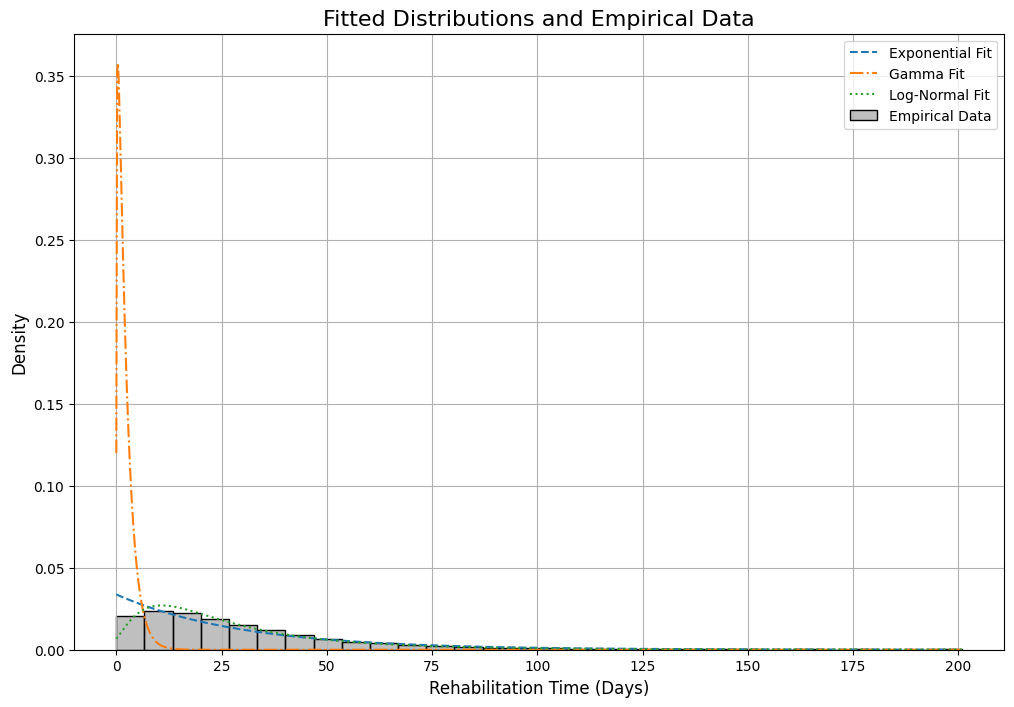

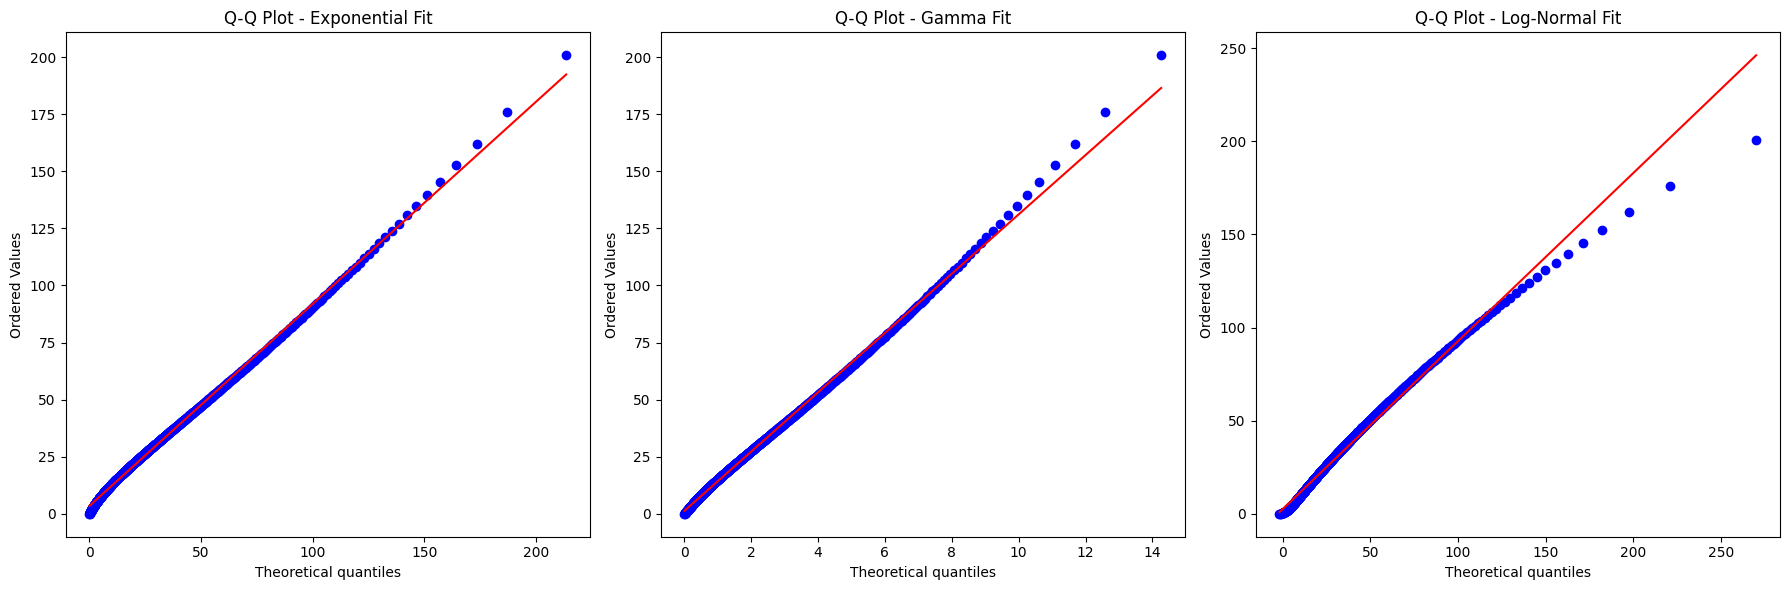

In [22]:
dist(stroke_data)

Stroke data is assumed to be lognormal


In [ ]:
# Step 1: Calculate the sample mean and variance
sample_mean = np.mean(stroke_data)
sample_variance = np.var(stroke_data)

# Step 2: Estimate sigma^2 (variance of the log)
sigma_squared = np.log(1 + (sample_variance / (sample_mean**2)))

# Step 3: Estimate mu (mean of the log)
mu = np.log(sample_mean) - (sigma_squared / 2)

# Step 4: Take the square root to get sigma (standard deviation of the log)
sigma = np.sqrt(sigma_squared)

# Display the results
print(f"Estimated Mu: {mu}")
print(f"Estimated Sigma: {sigma}")